In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
from numpy.random import random_sample as rs

import matplotlib.pyplot as plt

# Task 1

In [2]:
%%time
T = 20
K = 10
N = 5000

p_mc = 0.5
p_is = 0.9
data_mc = np.arange(0)
data_is = np.arange(0)

# define function c(x)*p(x)/q(x)
def cp_q(j, p_mc, p_is):
    value = ((p_mc) ** ((j + 1 + K) / 2) * (1 - p_mc) ** ((j + 1 - K) / 2)) /\
            ((p_is) ** ((j + 1 + K) / 2) * (1 - p_is) ** ((j + 1 - K) / 2) + np.finfo(float).eps)
    return value


for n in range(5000):
    
    # initialize the probability 
    prob_mc = 0
    prob_is = 0
    
    for i in range(N):
        
        w_mc = K
        w_is = K
        
        for j in range(20):
            
            if rs() < p_mc:
                w_mc -= 1
            else:
                w_mc += 1
                
            # if x <= 20, c(x) = 1, else, c(x) = 0
            if w_mc == 0:
                prob_mc += 1 / N
                break
            elif j == 19:
                prob_mc += 0
            
        for j in range(20):   
        
            if rs() < p_is:
                w_is -= 1
            else:
                w_is += 1
                
            if w_is == 0:
                prob_is += cp_q(j, p_mc, p_is) / N
                break
            elif j == 19:
                prob_is += 0

    data_mc = np.concatenate((data_mc, [prob_mc]))            
    data_is = np.concatenate((data_is, [prob_is]))

CPU times: user 5min 12s, sys: 21.3 ms, total: 5min 12s
Wall time: 5min 12s


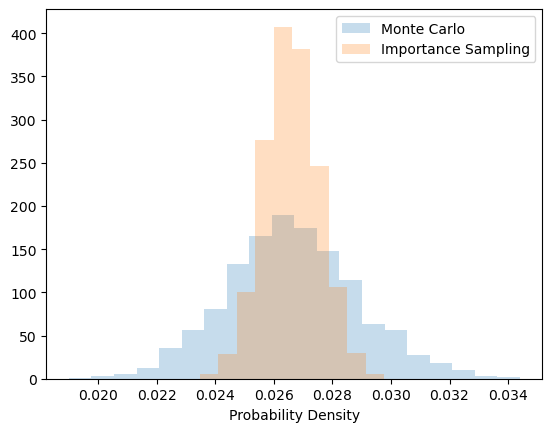

In [3]:
plt.figure(1)
plt.hist(data_mc, bins = 20, alpha = 0.25, density = True, label = 'Monte Carlo')
plt.hist(data_is, bins = 10, alpha = 0.25, density = True, label = 'Importance Sampling')
plt.legend(loc = 'upper right')
plt.xlabel('Probability')
plt.xlabel('Probability Density')
plt.savefig('figures/MC_vs_IS,jpg', dpi = 300)

# Task 2

In [2]:
# load the rainfall dataframe from csv file
rainfall = pd.read_csv('NEA_daily_rainfall_1981_2020.csv')
df = rainfall
display(df)

,Unnamed: 0,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1981-01-02,0.4,0.3,0.0,0.2,0.0,1.2,1.8,1.0,0.0,0.2,1.7,0.3,0.0,0.0
2,2,1981-01-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1981-01-04,3.3,31.7,7.0,11.0,0.0,1.3,2.8,21.8,6.9,5.9,18.6,37.5,53.5,4.0
4,4,1981-01-05,0.0,0.1,0.0,0.1,0.0,0.3,0.1,0.0,0.0,0.0,0.2,0.0,0.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595,14595,2020-12-27,12.4,18.0,2.6,12.2,2.2,15.0,0.6,36.0,0.0,14.8,42.8,35.0,7.8,12.6
14596,14596,2020-12-28,0.2,0.4,11.2,2.6,0.0,3.8,24.6,0.4,0.0,3.8,0.4,0.0,0.2,2.2
14597,14597,2020-12-29,9.0,7.6,3.4,4.6,3.2,2.8,0.4,1.8,0.0,5.4,2.6,6.0,28.4,18.0
14598,14598,2020-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.0


In [3]:
data = df.values[:, 1: 16]

for i in range(data.shape[0]):
    data[i, 0] = dt.datetime.strptime(data[i, 0], '%Y-%m-%d')

DJF = np.arange(0).reshape(0, 15)
MAM = np.arange(0).reshape(0, 15)
JJA = np.arange(0).reshape(0, 15)
SON = np.arange(0).reshape(0, 15)

djf = 0
mam = 0
jja = 0
son = 0

delta = dt.timedelta(days = 1)
i = 0
plt.savefig
for year in range(1981, 2020):

    begin = dt.date(year, 1, 1)
    end = dt.date(year, 12, 31)
    d = begin
    
    while d < dt.date(year, 3, 1):
        DJF = np.concatenate((DJF, data[i:i+1, :]))
        d += delta
        i += 1
    
    while d < dt.date(year, 6, 1):
        MAM = np.concatenate((MAM, data[i:i+1, :]))                     
        d += delta
        i += 1
        
    while d < dt.date(year, 9, 1):
        JJA = np.concatenate((JJA, data[i:i+1, :]))                     
        d += delta
        i += 1
        
    while d < dt.date(year, 12, 1):
        SON = np.concatenate((SON, data[i:i+1, :]))                     
        d += delta
        i += 1
        
    while d <= end:
        DJF = np.concatenate((DJF, data[i:i+1, :]))                     
        d += delta
        i += 1
      
    
print(DJF.shape)
print(DJF)

(3519, 15)
[[datetime.datetime(1981, 1, 1, 0, 0) 0.0 0.0 ... 0.0 0.0 0.0]
 [datetime.datetime(1981, 1, 2, 0, 0) 0.4 0.3 ... 0.3 0.0 0.0]
 [datetime.datetime(1981, 1, 3, 0, 0) 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [datetime.datetime(2020, 1, 7, 0, 0) 1.8 1.8 ... 2.2 5.6 2.0]
 [datetime.datetime(2020, 1, 8, 0, 0) 0.0 0.0 ... 3.0 0.4 0.0]
 [datetime.datetime(2020, 1, 9, 0, 0) 0.0 2.6 ... 0.0 0.8 0.0]]


In [4]:
# take the average value of rainfall of 14 stations
DJF_mean = np.mean(DJF[:, 1:].astype(float), axis = 1)
DJF_mean = DJF_mean.reshape(DJF_mean.shape[0], 1)
DJF_mean = np.concatenate((DJF[:, :1], DJF_mean), axis = 1)

In [5]:
# define no-rain as 'state 0', rain as 'state 1'

def transition_matrix(MMM, station):
    
    j = station
    Trans_Mat = np.zeros([2, 2])
    
    for i in range(len(MMM) - 1):
        
        if MMM[i+1, 0] - MMM[i, 0] == delta:
            
            if MMM[i, j] == 0 and MMM[i+1, j] == 0:
                Trans_Mat[0, 0] += 1
                
            elif MMM[i, j] == 0 and MMM[i+1, j] != 0:
                Trans_Mat[0, 1] += 1 
                
            elif MMM[i, j] != 0 and MMM[i+1, j] == 0:
                Trans_Mat[1, 0] += 1       
                
            elif MMM[i, j] != 0 and MMM[i+1, j] != 0:
                Trans_Mat[1, 1] += 1
                
    Trans_Mat = Trans_Mat / (np.sum(Trans_Mat, axis = 1).reshape(2, 1) + np.finfo(float).eps)
    
    return Trans_Mat.reshape(2, 2, 1)

TM_DJF = np.arange(0).reshape(2, 2, 0)

# calculate different transition matrices for 14 stations
for station in range(1, 15):
    TM_DJF = np.concatenate((TM_DJF, transition_matrix(DJF, station)), axis = 2)

# calculate transition matrix for mean value of 14 stations    
TM_DJF_mean = transition_matrix(DJF_mean, 1)

In [6]:
TM_DJF_mean

array([[[0.49822485],
        [0.50177515]],

       [[0.16533333],
        [0.83466667]]])

In [7]:
# create a matrix to store factors of fitted distribution (exponential distribution)
dist = np.arange(0).reshape(1, 2, 0)

for station in range(1, 15):
    
    rain = np.arange(0)
    factor = np.zeros([1, 2, 1])
    
    for i in range(len(DJF)):
        
        if DJF[i, station] > 0:
            rain = np.concatenate((rain, DJF[i:i+1, station].astype(float)))
        
    factor[:, :, 0] = np.matrix([stats.expon.fit(rain, floc = 0)])
    dist = np.concatenate((dist, factor), axis = 2)

# create a matrix to store factors of fitted distribution (exponential distribution) (mean)
for i in range(len(DJF)):
    if DJF_mean[i, 1] > 0:
        rain = np.concatenate((rain, DJF[i:i+1, station].astype(float)))
    factor[:, :, 0] = np.matrix([stats.expon.fit(rain, floc = 0)])
dist_mean = factor

In [8]:
# create an adaptive transition matrix for rainfall generator including fitted distribution factors (loc & alpha)
TM_DJF_gen = np.concatenate((TM_DJF, dist))
TM_DJF_gen_mean = np.concatenate((TM_DJF_mean, dist_mean))

In [9]:
def rainfall_generator(pre_state, TM):
    
    if rs() < TM[1 * (pre_state > 0), 0]:
        now_state = 0
    else:
        now_state = stats.expon.rvs(loc = TM[2, 0], scale = TM[2, 1], size = 1, random_state = None)[0]
        
    return now_state

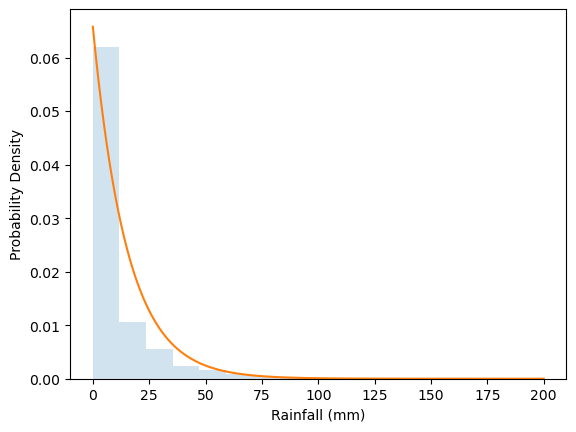

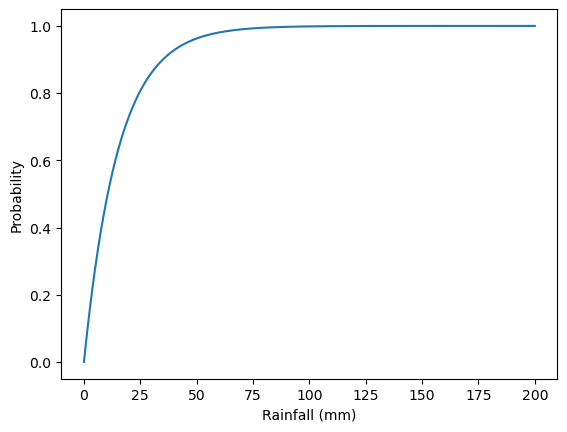

In [10]:
# plot the fitted distribution of station 1 as an example
loc, alpha = TM_DJF_gen[2, 0, 0], TM_DJF_gen[2, 1, 0]

plt.figure(1)
x = np.linspace(0-loc, 200-loc, 10000)
y = stats.expon.pdf(x, scale = alpha)
Y = stats.expon.cdf(x, scale = alpha)
# Plot exponentional distribution of LSMEM
plt.hist(rain, density = True, histtype = 'stepfilled', alpha = 0.2, bins = 15)
plt.plot(x+loc, y)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Probability Density')
plt.savefig('figures/pdf_stn1.jpg')

plt.figure(2)
plt.plot(x+loc, Y)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Probability')
plt.savefig('figures/cdf_stn1.jpg')

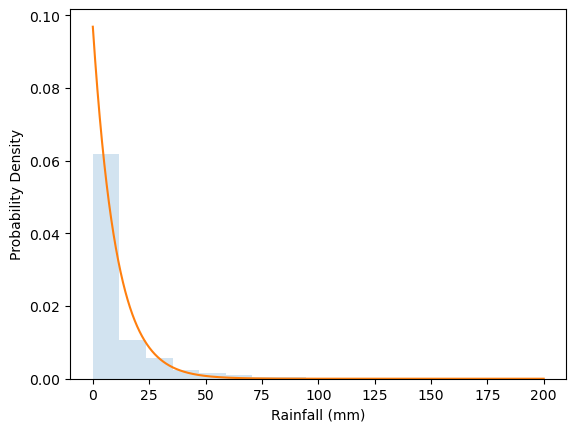

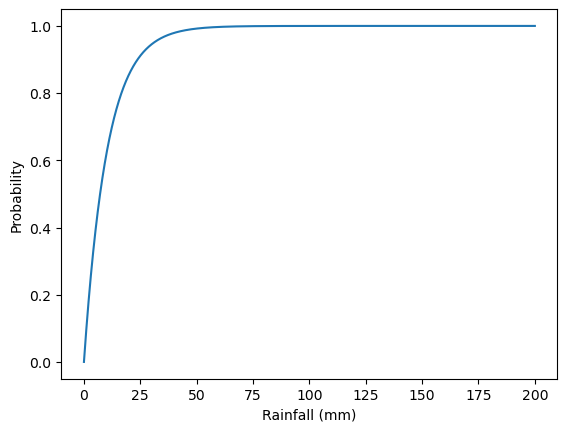

In [11]:
# plot the fitted distribution of mean value as an example
loc, alpha = TM_DJF_gen_mean[2, 0, 0], TM_DJF_gen_mean[2, 1, 0]

plt.figure(1)
x = np.linspace(0-loc, 200-loc, 10000)
y = stats.expon.pdf(x, scale = alpha)
Y = stats.expon.cdf(x, scale = alpha)
# Plot exponentional distribution of LSMEM
plt.hist(rain, density = True, histtype = 'stepfilled', alpha = 0.2, bins = 15)
plt.plot(x+loc, y)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Probability Density')
plt.savefig('figures/pdf_average.jpg')

plt.figure(2)
plt.plot(x+loc, Y)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Probability')
plt.savefig('figures/cdf_average.jpg')

# Task 3.1

In [41]:
# MCMC
T = 90
rp = 1200

rain_state = np.zeros([rp, T])


for i in range(rp):
    
    for j in range(T - 1):
    
        new_state = rainfall_generator(rain_state[i, j], TM_DJF_gen_mean[:, :, 0])
        rain_state[i, j + 1] = new_state
        
rain_state.shape

(1200, 90)

In [42]:
deficit_MCMC = 90 * np.mean(DJF_mean[:, 1]) - np.sum(rain_state, axis = 1)

In [43]:
np.max(deficit_MCMC)

222.58750561684485

In [44]:
sort = np.ones([rp, 1])

for i in range(rp):
    
    for j in range(rp):
        
        if deficit_MCMC[j] > deficit_MCMC[i]:
            
            sort[i] += 1
            
rp_5d_MCMC = rp / sort

In [45]:
np.sum(deficit_MCMC.reshape(deficit_MCMC.shape[0], 1) * (sort == 1))

222.58750561684485

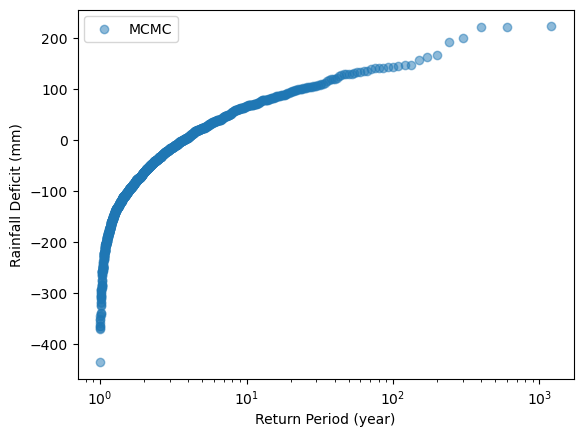

In [46]:
plt.scatter(rp_5d_MCMC[:, 0], deficit_MCMC, alpha = 0.5, label = 'MCMC')
plt.legend()
plt.xlabel('Return Period (year)')
plt.ylabel('Rainfall Deficit (mm)')
plt.xscale('log')
plt.savefig('figures/MCMC_300y.jpg')

# Task 3.2

In [18]:
n = 0

for i in range(len(DJF_mean)):
    
    if DJF_mean[i, 1] == 0:
        
        n += 1
    
dry_rate = n / len(DJF_mean)

# define the initial condition generator based on the dry rate in DJF season
def initial_state(dry_rate, TM):
    
    if rs() < dry_rate:
        
        value = 0
        
    else:
        
        value = stats.expon.rvs(loc = TM[2, 0], scale = TM[2, 1], size = 1, random_state = None)[0]
        
    return value

In [21]:
%%time
k = 0.08

# create 100 trajectories
N = 200
T = 90
step = 5

RP_multi = np.arange(0).reshape(N, 0)
DEFICIT_multi = np.arange(0).reshape(N, 0)

for order in range(10):

    traj = np.zeros([N, T])
    traj_step = np.zeros([N, step])

    label = np.zeros([N, int(T/step) + 1])
    weight = np.zeros([N, int(T/step)])
    deficit = np.zeros([N, int(T/step)])

    weight_step = np.zeros([N])
    deficit_step = np.zeros([N])

    # generate the first time step series based on random initial conditions
    for n in range(N):

        traj_step[n, 0] = initial_state(dry_rate, TM_DJF_gen_mean[:, :, 0])

        for i in range(1, 5):

            traj_step[n, i] = rainfall_generator(traj_step[n, i-1], TM_DJF_gen_mean[:, :, 0])


    # create new trajectories based on previous cloning and killing, and repeat the process 
    for t in range(int(T/step)):

        # calculate the deficit of each generated series step
        deficit_step = step * np.mean(DJF_mean[:, 1]) - np.sum(traj_step, axis = 1)

        # calculate weights for each trajectories
        weight_adj = np.zeros(N)

        for n in range(N):

            weight_step[n] = N * np.exp(k * deficit_step[n]) / \
                        (np.sum([np.exp(k * deficit_step[n]) for n in range(N)]))

        # adjust weight to integers
        weight_adj = [int((i + rs())) for i in weight_step]

        # make the amount of the trajectories competitive
        if sum(weight_adj) < N:

            while sum(weight_adj) < N:

                weight_adj[np.random.randint(N)] += 1

        elif sum(weight_adj) > N:

            while sum(weight_adj) > N:

                j = np.random.randint(N)

                if weight_adj[j] > 0:
                    weight_adj[j] -= 1

        # assign label of parent trajectories
        label_step = np.arange(0)

        for n in range(N):

            label_step = np.concatenate((label_step, np.ones(weight_adj[n]) * n))

        for n in range(N):

            l = np.random.randint(N)
            label[n, t + 1] = label_step[-l]

        weight[:, t] = weight_step.copy()
        deficit[:, t] = deficit_step.copy()

        traj[:, step*t:step*(t+1)] = traj_step


        # generate new time series step
        for n in range(N):

            traj_step[n, 0] = rainfall_generator(traj[int(label[n, t + 1]), step * t - 1], TM_DJF_gen_mean[:, :, 0])

            for i in range(1, 5):

                traj_step[n, i] = rainfall_generator(traj_step[n, i - 1], TM_DJF_gen_mean[:, :, 0])

    # label the topological trajectories
    label_topo = np.zeros([N, int(T / step)])

    label_topo[:, -1] = label[:, -1]

    for t in range(1, int(T / step)):

        for n in range(N):

            label_topo[n, -t-1] = label[int(label_topo[n, -t]), -t-1]

    # tracing back the topological trajectories
    traj_topo = np.zeros([N, T])
    weight_topo = np.zeros([N, int(T / step)])
    deficit_topo = np.zeros([N, int(T / step)])

    for n in range(N):

        for t in range(int(T / step)):

            traj_topo[n, step*t:step*(t+1)] = traj[int(label_topo[n, t]), step*t:step*(t+1)]
            deficit_topo[n, t] = deficit[int(label_topo[n, t]), t]
            weight_topo[n, t] = weight[int(label_topo[n, t]), t]

    # calculate the return period for each generated series step
    DEFICIT = np.sum(deficit_topo, axis = 1)
    SORT = np.ones(N)

    for i in range(N):

        for j in range(N):

            if DEFICIT[j] > DEFICIT[i]:

                SORT[i] += 1

    RP = N / SORT * np.prod(weight_topo, axis = 1)
    
    RP_multi = np.concatenate((RP_multi, RP.reshape(N, 1)), axis = 1)
    DEFICIT_multi = np.concatenate((DEFICIT_multi, DEFICIT.reshape(N, 1)), axis = 1)

CPU times: user 13.6 s, sys: 10.9 ms, total: 13.7 s
Wall time: 13.6 s


In [22]:
from scipy import interpolate

fit = []

for order in range(10):
    
    x = 10 ** np.arange(3.5, 6, 0.01)
    f = interpolate.interp1d(RP_multi[:, order], DEFICIT_multi[:, order])
    y = f(x)
    
    fit.append(y)

In [23]:
# print the mean and standard deviation of deficit in 1-in-10000 year drought event
np.array(fit).shape
print(np.mean(np.array(fit)[:, 50]))
print(np.std(np.array(fit)[:, 50]))

300.45030736840715
5.210533538847959


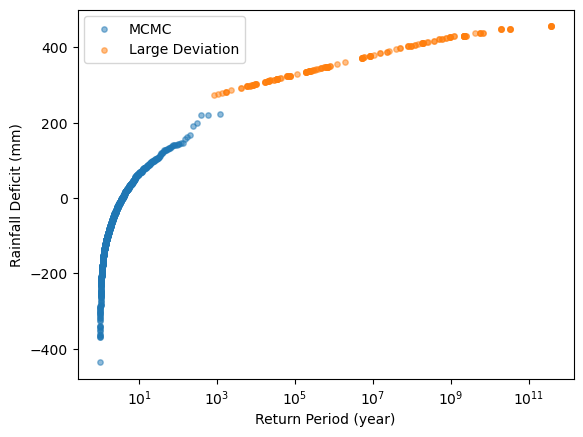

In [47]:
m = 8

plt.scatter(rp_5d_MCMC, deficit_MCMC, alpha = 0.5, s = 15, label = 'MCMC')
plt.scatter(RP_multi[:, m], DEFICIT_multi[:, m], alpha = 0.5, s = 15, label = 'Large Deviation')
plt.legend()
plt.xscale('log')
plt.xlabel('Return Period (year)')
plt.ylabel('Rainfall Deficit (mm)')
plt.savefig('figures/Large_Deviation.jpg')

# Task 3.3

In [49]:
%%time
# Use 10 year block maximun to fit gev
T = 90
rp = 10

blk_max = np.arange(0)

for n in range(100):

    rain_state = np.zeros([rp, T])

    for i in range(rp):
    
        for j in range(T - 1):
    
            new_state = rainfall_generator(rain_state[i, j], TM_DJF_gen_mean[:, :, 0])
            rain_state[i, j + 1] = new_state
            
    blk_max = np.concatenate((blk_max, [np.max(np.mean(DJF_mean[:, 1]) * T - np.sum(rain_state, axis = 1))]))

CPU times: user 2.93 s, sys: 51 ms, total: 2.98 s
Wall time: 2.92 s


In [50]:
c, loc, scale = stats.genextreme.fit(blk_max)

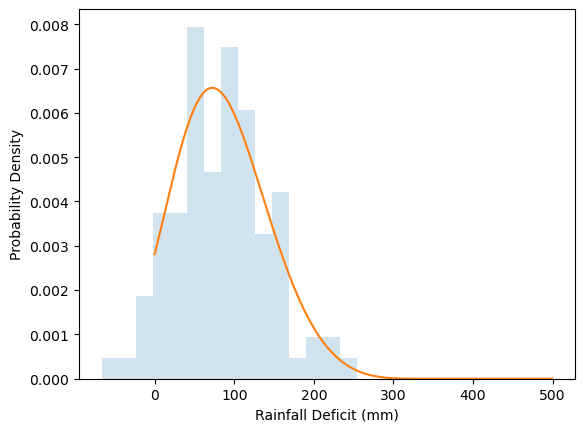

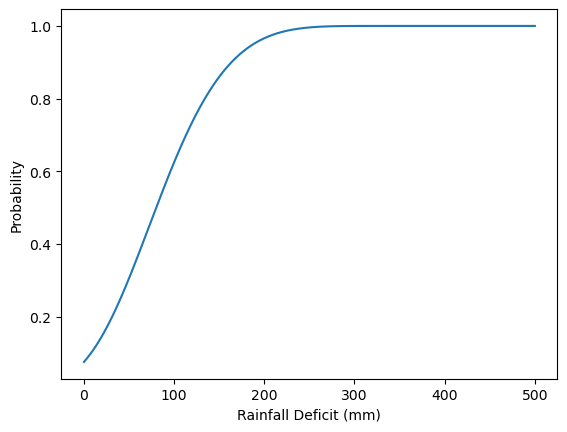

In [51]:
plt.figure(1)
x = np.linspace(0, 500, 10000)
y = stats.genextreme.pdf(x, c, loc = loc, scale = scale)
Y = stats.genextreme.cdf(x, c, loc = loc, scale = scale)
# Plot GEV distribution
plt.hist(blk_max, density = True, histtype = 'stepfilled', alpha = 0.2, bins = 15)
plt.plot(x, y)
plt.xlabel('Rainfall Deficit (mm)')
plt.ylabel('Probability Density')
plt.savefig('figures/pdf_gev.jpg')

plt.figure(2)
plt.plot(x, Y)
plt.xlabel('Rainfall Deficit (mm)')
plt.ylabel('Probability')
plt.savefig('figures/cdf_gev.jpg')

In [52]:
stats.genextreme.ppf(1 - 10 / 10000, c, loc = loc, scale = scale)

273.52991767973793

In [53]:
%%time
# Use 10 year block maximun to fit gev
T = 90
rp = 10

blk_max = np.arange(0)
DDDeficit = np.arange(0)

for t in range(20):

    for n in range(100):

        rain_state = np.zeros([rp, T])

        for i in range(rp):
    
            for j in range(T - 1):
    
                new_state = rainfall_generator(rain_state[i, j], TM_DJF_gen_mean[:, :, 0])
                rain_state[i, j + 1] = new_state
            
        blk_max = np.concatenate((blk_max, [np.max(np.mean(DJF_mean[:, 1]) * T - np.sum(rain_state, axis = 1))]))
    
    c, loc, scale = stats.genextreme.fit(blk_max)
    DDDeficit = np.concatenate((DDDeficit, [stats.genextreme.ppf(1 - 10 / 10000, c, loc = loc, scale = scale)]))

CPU times: user 59.8 s, sys: 2.99 s, total: 1min 2s
Wall time: 58.9 s


In [54]:
Mean_deficit = np.mean(DDDeficit)
Std_deficit = np.std(DDDeficit)
print(Mean_deficit)
print(Std_deficit)

373.980973301938
239.51528457027112
